<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2023-24

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 11th JANUARY @ 14:00**. 

In [2]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

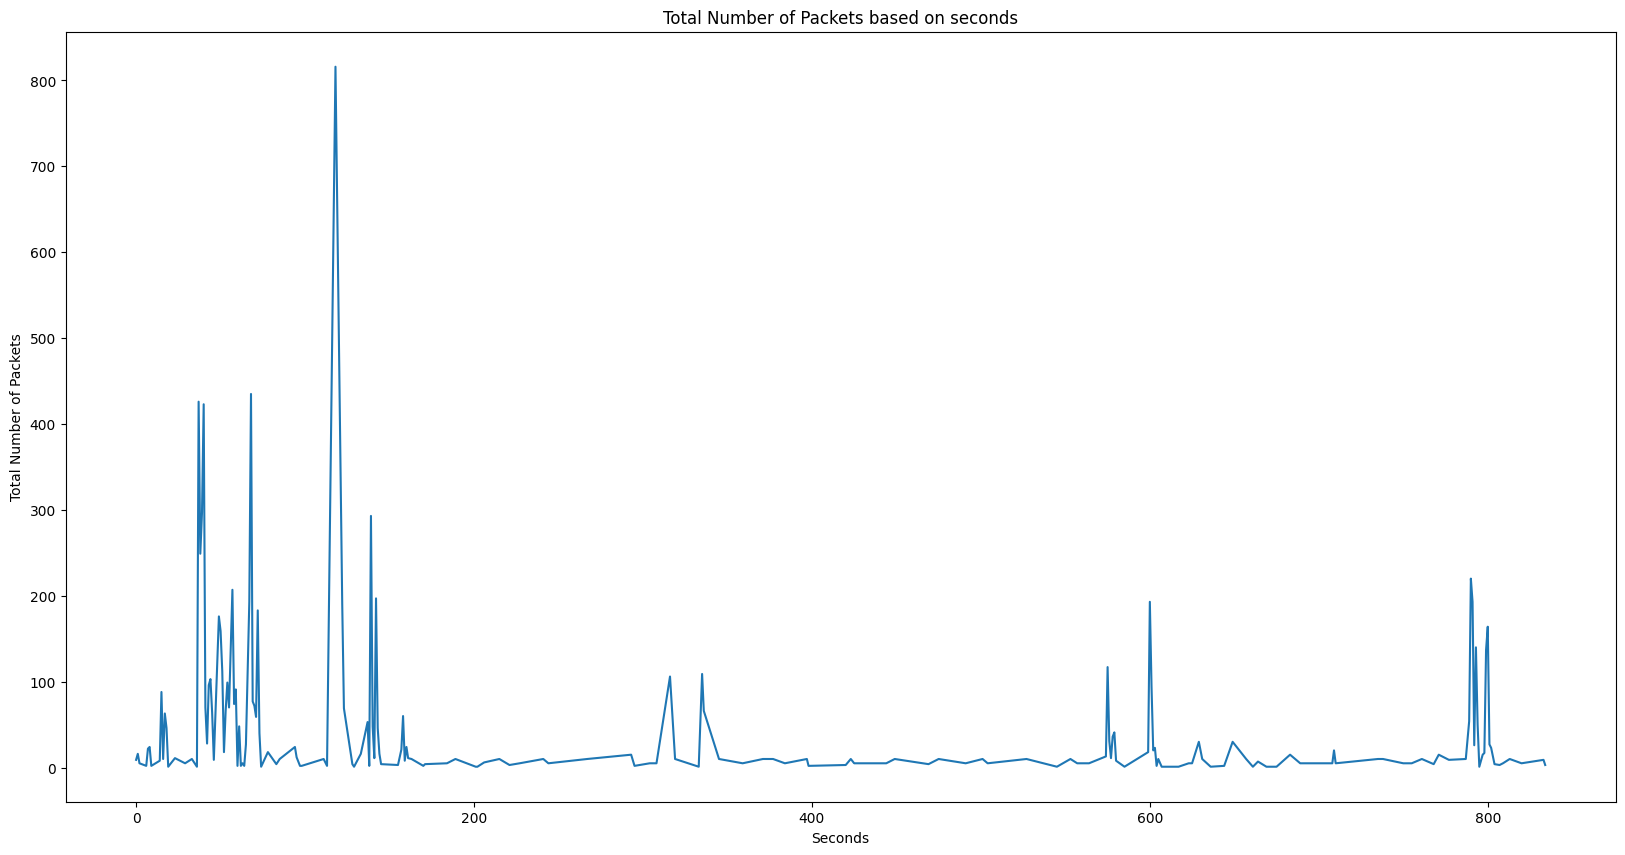

,Time,Source,Destination,Protocol,Length,Info
Seconds,,,,,,
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
0,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
0,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
0,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
0,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
833,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
833,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
834,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."


In [3]:
# ANSWER
plt.figure(figsize=(20,10))
######### ADD YOUR CODE HERE ##########


#aggregate seconds
timeVar = []
for i in data['Time']:
   timeVar.append(round(i))
   

#creates new dataframe
dataTask1 = data
#adds new column to dataframe
dataTask1.insert(1, "Seconds", timeVar)
#creates the new index
dataTask1 = dataTask1.set_index('Seconds')


#for plotting
plt.title("Total Number of Packets based on seconds")
plt.xlabel("Seconds")
plt.ylabel("Total Number of Packets")

#function that counts the occurrences of the rows within each index (second) and simultaneously plots it
dataTask1.index.value_counts().sort_index().plot(kind='line')
plt.show()


### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

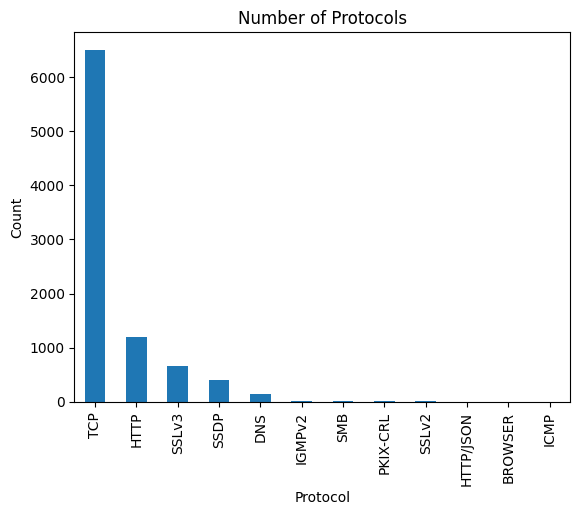

In [4]:
# ANSWER
######### ADD YOUR CODE HERE ##########

#for plot graph formatting
plt.title("Number of Protocols")
plt.xlabel("Protocol")
plt.ylabel("Count")

#counts each protocol and plots the number on barchart
count = data['Protocol'].value_counts().plot(kind='bar')

plt.show()

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

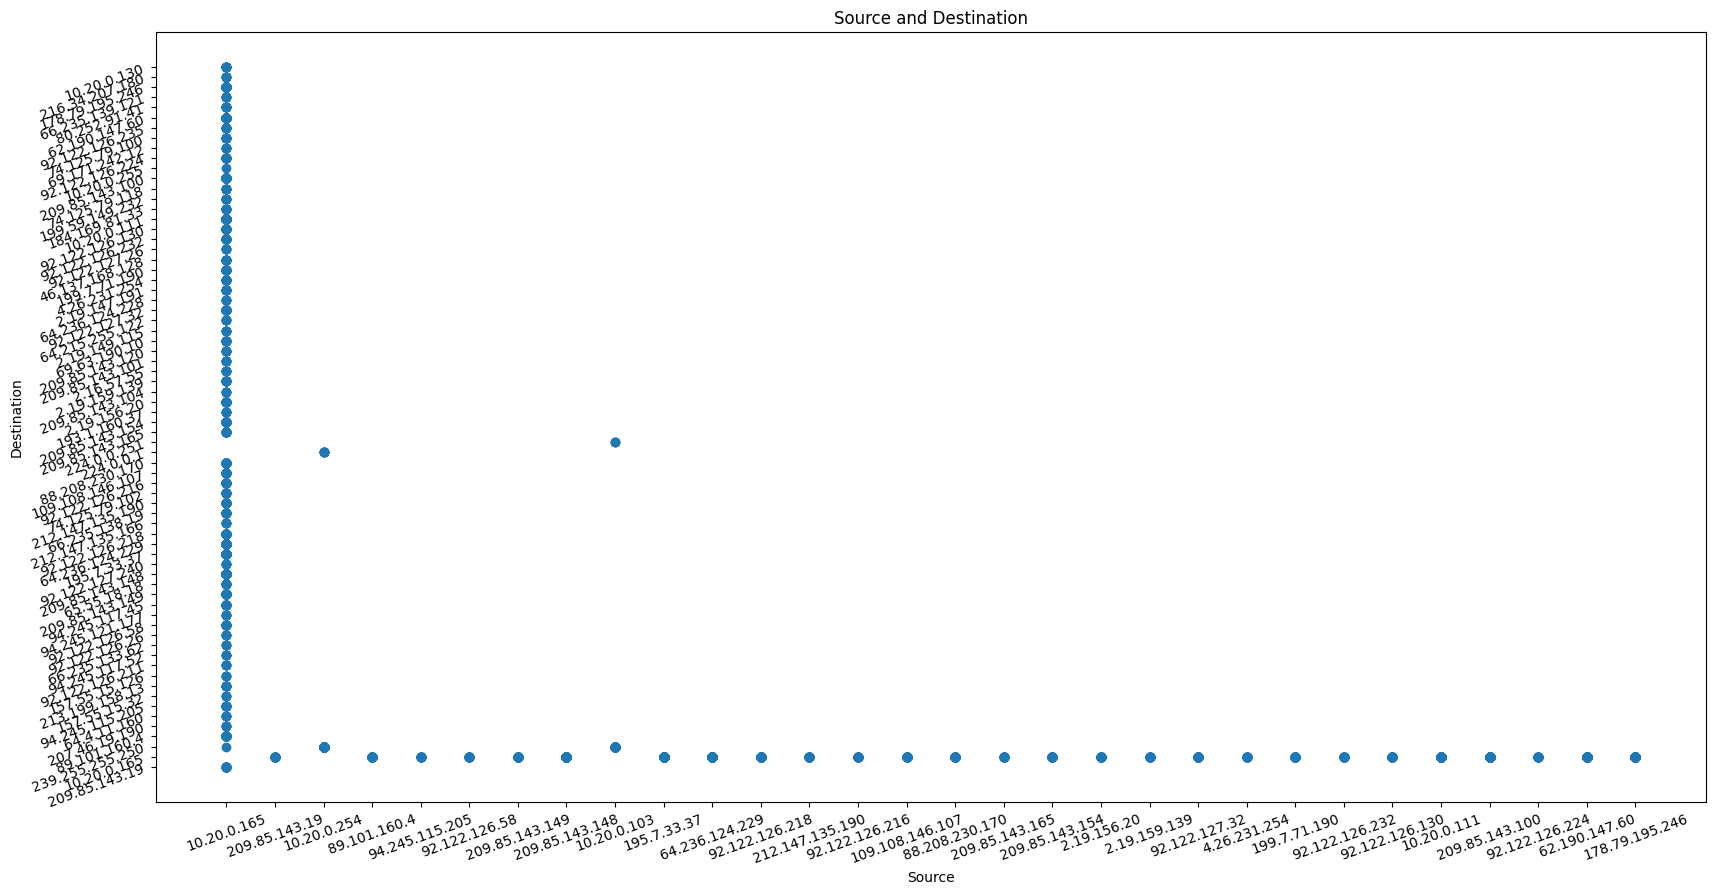

In [5]:
# ANSWER
plt.figure(figsize=(20,10))
plt.xticks(rotation=20)
plt.yticks(rotation=20)
######### ADD YOUR CODE HERE ##########

plt.title("Source and Destination")
plt.xlabel("Source")
plt.ylabel("Destination")

#plots source as x-axis and destination as y-axis
plt.scatter(data['Source'], data['Destination'])

plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

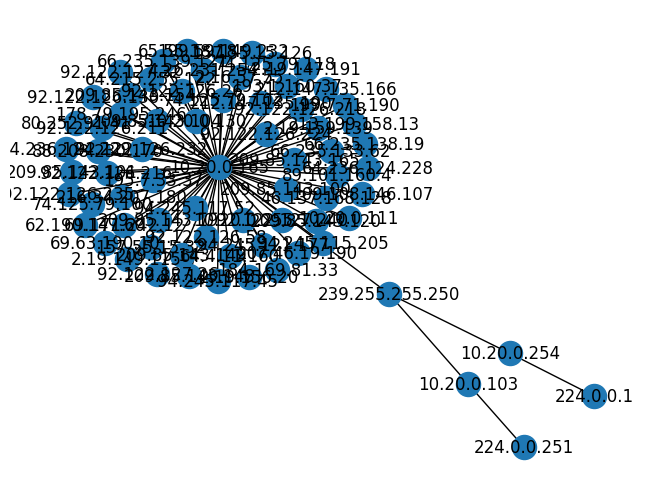

In [6]:
# ANSWER
######### ADD YOUR CODE HERE ##########

#creates the graph
G = nx.Graph()
data1 = nx.node_link_data(G)

sArray = [] #source
dArray = [] #destination

#turn the dataframe values into an array
for i in data['Source']:
    sArray.append(i)
for j in data['Destination']:
    dArray.append(j)

graphArray = [] 
#get the source and destination arrays and add them to the graph array
for i in range(len(sArray)):
    n = sArray[i],dArray[i]
    graphArray.append(n)

#add the graph edges
G.add_edges_from(*[graphArray])

#display the graph
nx.draw(G,with_labels=True)




### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [7]:
######### ADD YOUR CODE HERE ##########

#List of unique protocols
protocolList = data['Protocol'].unique()

#adds the protocol as columns and assigns them to 'False' initially
for protocol in protocolList:
    data[protocol] = 'False' 

#assgins the protocol from the protocol column as 'true' in the dedicated protocol column
for indexRow, row in data.iterrows():
    eachProtocol = row["Protocol"] # prints each protocol in the column
    data.at[indexRow, eachProtocol] = 'True' #adds True to corresponding protocol

data


,Time,Seconds,Source,Destination,Protocol,Length,Info,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,0.000000,0,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,True,False,False,False,False,False,False,False,False,False,False,False
1,0.017691,0,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",True,False,False,False,False,False,False,False,False,False,False,False
2,0.017729,0,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,True,False,False,False,False,False,False,False,False,False,False,False
3,0.018382,0,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,False,True,False,False,False,False,False,False,False,False,False,False
4,0.032859,0,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,833.452154,833,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID...",False,False,False,False,False,False,False,False,False,False,False,True
9382,833.458302,833,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:",False,False,False,False,False,False,False,False,False,False,False,True
9384,833.557382,834,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra...",False,False,False,False,False,False,False,False,False,False,False,True
9386,833.558091,834,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA...",False,False,False,False,False,False,False,False,False,False,False,True


### Question 6: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol. 

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

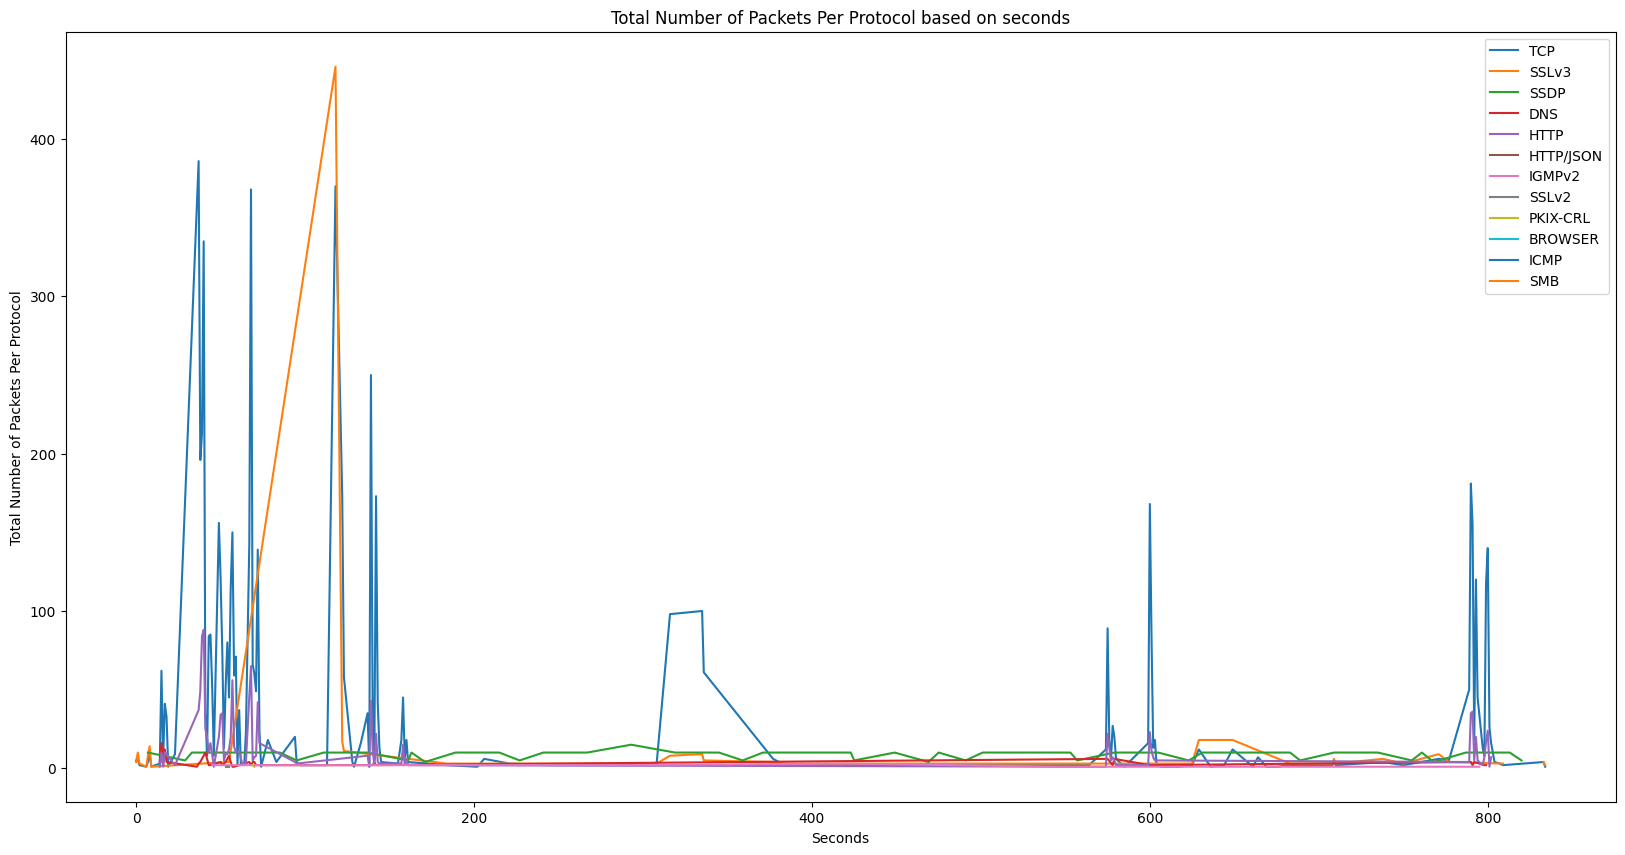

In [8]:
# ANSWER
######### ADD YOUR CODE HERE ##########

#set seconds as index
data = data.set_index('Seconds')

#for plotting
plt.figure(figsize=(20,10))
plt.title("Total Number of Packets Per Protocol based on seconds")
plt.xlabel("Seconds")
plt.ylabel("Total Number of Packets Per Protocol")


#iterate through each protocol
for protocol in protocolList:
#if the current protocol is True in respective protocol column add to variable
    protocolRow = data.loc[data[protocol] == 'True']
    #function to calculate the occurrences of the protocol per index (seconds)
    countProtocol = protocolRow.index.value_counts().sort_index()
    #plot each protocol - creating a multi line graph
    countProtocol.plot(kind='line', label='Protocols')

#legend outputted once all protocols are plotted
plt.legend(protocolList,loc='best') 
plt.show()



### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

Q1’s line chart shows that at certain seconds more packets are sent, more activity from 0-200 seconds than 200-800 seconds. The biggest spike of total packets sent occurs at 100-150 seconds with over 800 packets. Also, at the beginning the packets intervals are shorter comparing to later where there are larger intervals, e.g., at 600 seconds and 800 seconds. This may indicate Denial of Service (DoS) attack, involving sending high volumes of traffic, in this case at the beginning, to overwhelm UWEtech’s system.
Q2 shows that TCP is the most used, at over 6000 times, followed by HTTP, likely due to TCP being widely used.
Q3’s scatter plot shows that within UWEtech’s network 224.0.0.1 and 224.0.0.251 are point anomolies. The IP’s are used for multicasting, where the sender broadcasts IP data streams to multiple destinations simultaneously (IONIS, 2023).
Q4’s graph shows, like Q3, that there are 2 outlier IP’s and a large central node with the other IP's
Q6’S graph shows the breakdown of each protocol. While TCP is the most used protocol, the biggest spike was from SSLv3. TCP is used in conjunction with HTTP. SSDP protocol is used consistently. The beginning shows a variety of protocol used.

Reference:
IONIS (2023) Multicast: Point-to-multipoint Connection for Efficient Data Transfer IONOS Digitalguide. 21 March 2023 [online]. Available from: https://www.ionos.co.uk/digitalguide/server/know-how/multicast/ [Accessed 29 October 2023].
